# Project Information

**Project Title**:
Analyzing Key Factors Influencing US Home Prices Over the Last 20 Years

**Project Overview**:
The objective of this project is to build a data science model that explains the impact of key factors on US home prices over the last two decades. The project involves finding publicly available data for these influencing factors and using the S&P Case-Schiller Home Price Index (CSUSHPIS) as a proxy for home prices.

![Real Estate Image](https://www.goldmansachs.com/intelligence/pages/articles/real-estate-may-still-offer-a-hedge-for-investors/800x450.jpg)

**Name** : Sachin Boora

**Contact** : sachnboora@gmail.com, +91-9996292765

# Project Plan

We will cover this entire project by dividing it in 4 sections :     



1.   **Data Collection** : I will collect data from various sources including US Govt offical websites and from different publicly available data. I will share links for each data source as and when required.
2.   **Data Preparation** : After collecting data, i will consolidate all the data into a csv file and access the file.
3. **EDA** : I will analyse the prepared data using various plotting methods and how different factors are correlated to each other.
4. **Modeling** : With the help of all the above information , i will build a suitable model which will predict index prices in US real estate.



# Data Collection

I have collected data mainly from https://fred.stlouisfed.org/

The website "https://fred.stlouisfed.org/" is an official website of the Federal Reserve Economic Data (FRED), which is maintained by the Federal Reserve Bank of St. Louis. FRED is an extensive online database of economic data and financial indicators

I have downloaded data from ***2001-01 to 2023-07*** in csv format.
Here are the files details and source from where I have fetched data :

S&P/Case-Shiller U.S. National Home Price Index : https://fred.stlouisfed.org/series/CSUSHPISA

GDP : https://fred.stlouisfed.org/series/GDP

New Privately-Owned Housing Units Started: Total Units : https://fred.stlouisfed.org/series/HOUST

30-Year Fixed Rate Mortgage Average in the United States : https://fred.stlouisfed.org/series/MORTGAGE30US

Monthly Supply of New Houses in the United States : https://fred.stlouisfed.org/series/MSACSR

Personal Income : https://fred.stlouisfed.org/series/PI

Population : https://fred.stlouisfed.org/series/POPTHM

Personal Saving Rate : https://fred.stlouisfed.org/series/PSAVERT

Unemployment Rate : https://fred.stlouisfed.org/series/UNRATE




**Target Data** : S&P/Case-Shiller U.S. National Home Price Index

**Feature Data** : All other Data

# Data Preparation

Let's clean our data now by changing column names, setting date as Index

In [90]:
import pandas as pd

In [2]:
target_data = pd.read_csv("/content/Project Data/ S&P:Case-Shiller U.S. National Home Price Index.csv")
target_data.head()

,DATE,CSUSHPISA
0,2000-01-01,100.551
1,2000-02-01,101.339
2,2000-03-01,102.127
3,2000-04-01,102.922
4,2000-05-01,103.678


In [3]:
target_data.set_index('DATE', inplace=True)
target_data.rename(columns={'CSUSHPISA': 'target'}, inplace=True)
target_data.index = pd.to_datetime(target_data.index)
target_data.head()


,target
DATE,
2000-01-01,100.551
2000-02-01,101.339
2000-03-01,102.127
2000-04-01,102.922
2000-05-01,103.678


In [4]:
target_data.to_csv("Cleaned Data/target.csv")


Lets follow the same process to rename columns and set date column as index for all other feature data


## Personal Income

Personal Income is one of the key factors that influence US real estate prices as increase in personal income also led to increase in purchasing power which ultimately increases demand and prices of real estate

In [5]:
personal_income = pd.read_csv("/content/Project Data/Personal Income.csv")
personal_income.head()

,DATE,PI
0,2000-01-01,8348.0
1,2000-02-01,8408.8
2,2000-03-01,8468.3
3,2000-04-01,8506.8
4,2000-05-01,8544.5


In [6]:
personal_income.set_index('DATE', inplace=True)
personal_income.rename(columns={'PI': 'Personal Income'}, inplace=True)
personal_income.index = pd.to_datetime(personal_income.index)
personal_income.head()

,Personal Income
DATE,
2000-01-01,8348.0
2000-02-01,8408.8
2000-03-01,8468.3
2000-04-01,8506.8
2000-05-01,8544.5


In [7]:
personal_income.to_csv("Cleaned Data/Personal_Income.csv")

## Population

As population increases, also grows the demand of houses to live which will fuel the demand and prices of real estate

In [8]:
population = pd.read_csv("/content/Project Data/Population.csv")
population.head()

,DATE,POPTHM
0,2000-01-01,281083.0
1,2000-02-01,281299.0
2,2000-03-01,281531.0
3,2000-04-01,281763.0
4,2000-05-01,281996.0


In [9]:
population.set_index('DATE', inplace=True)
population.rename(columns={'POPTHM': 'Population'}, inplace=True)
population.index = pd.to_datetime(population.index)
population.head()

,Population
DATE,
2000-01-01,281083.0
2000-02-01,281299.0
2000-03-01,281531.0
2000-04-01,281763.0
2000-05-01,281996.0


In [10]:
population.to_csv("Cleaned Data/Population.csv")

## Unemployment Rate

Unemployment rate is one of the direct factor that impacts the prices of real estate as the more the unemployment, less the buying capacity, hence less demand led to less prices

In [11]:
unemployment_rate = pd.read_csv("/content/Project Data/Unemployment Rate.csv")
unemployment_rate.head()

,DATE,UNRATE
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0


In [12]:
unemployment_rate.set_index('DATE', inplace=True)
unemployment_rate.rename(columns={'UNRATE': 'Unemployment Rate'}, inplace=True)
unemployment_rate.index = pd.to_datetime(unemployment_rate.index)
unemployment_rate.head()

,Unemployment Rate
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [13]:
unemployment_rate.to_csv("Cleaned Data/Unemployment_Rate.csv")

## GDP

GDP is the criteria which shows the development of a nation. The more the GDP is, the more developed nation is, which also directly impacts the prices of real estate

In [92]:
gdp_data = pd.read_csv("/content/Project Data/GDP.csv")
gdp_data.head()

,DATE,GDP
0,2000-01-01,10002.179
1,2000-04-01,10247.720
2,2000-07-01,10318.165
3,2000-10-01,10435.744
4,2001-01-01,10470.231


In [93]:
gdp_data.set_index('DATE', inplace=True)
gdp_data.index = pd.to_datetime(gdp_data.index)

# Resampling
gdp_data = gdp_data.resample('M').ffill() #this will resample the index to monthly and then fill extra created rows with last observed value

# Set the day of the index to 1
gdp_data.index = gdp_data.index.map(lambda x: x.replace(day=1))
gdp_data = gdp_data["2000-01-01":"2023-07-01"]

gdp_data.head()

,GDP
DATE,
2000-01-01,10002.179
2000-02-01,10002.179
2000-03-01,10002.179
2000-04-01,10247.720
2000-05-01,10247.720


In [95]:
gdp_data.to_csv("/content/Cleaned Data/GDP.csv")

## Mortgage Rate

A mortgage rate is the interest rate charged for a home loan. If mortgage rate is high, people will be less interested to take a loan for home, which will negatively impact the prices

In [84]:
mortgage_rate_monthly = pd.read_csv("/content/Project Data/Mortgage_monthly.csv")
mortgage_rate_monthly.head()

,DATE,MORTGAGE30US
0,2000-01-01,8.2100
1,2000-02-01,8.3250
2,2000-03-01,8.2400
3,2000-04-01,8.1525
4,2000-05-01,8.5150


In [85]:
mortgage_rate_monthly.set_index('DATE', inplace=True)
mortgage_rate_monthly.rename(columns={'MORTGAGE30US': 'Mortgage Rate Monthly'}, inplace=True)
mortgage_rate_monthly.index = pd.to_datetime(mortgage_rate_monthly.index)
mortgage_rate_monthly.head()

,Mortgage Rate Monthly
DATE,
2000-01-01,8.2100
2000-02-01,8.3250
2000-03-01,8.2400
2000-04-01,8.1525
2000-05-01,8.5150


In [86]:
mortgage_rate_monthly.to_csv("/content/Cleaned Data/Mortgage_Rate_monthly.csv")

## Personal Saving Rate

The personal saving rate is a measure that reflects the portion of disposable income that households save rather than spend. As savings increases, it means people are spending less on investments such as real estate which slows the demand for buying new houses

In [20]:
personal_saving_rate = pd.read_csv("/content/Project Data/Personal Saving Rate.csv")
personal_saving_rate.head()

,DATE,PSAVERT
0,2000-01-01,4.5
1,2000-02-01,4.0
2,2000-03-01,3.8
3,2000-04-01,4.3
4,2000-05-01,4.3


In [21]:
personal_saving_rate.set_index('DATE', inplace=True)
personal_saving_rate.rename(columns={'PSAVERT': 'Personal Saving Rate'}, inplace=True)
personal_saving_rate.index = pd.to_datetime(personal_saving_rate.index)
personal_saving_rate.head()

,Personal Saving Rate
DATE,
2000-01-01,4.5
2000-02-01,4.0
2000-03-01,3.8
2000-04-01,4.3
2000-05-01,4.3


In [22]:
personal_saving_rate.to_csv("Cleaned Data/Personal_Saving_Rate.csv")

## Inventory Level Impact

The balance between housing supply and demand in a particular market can influence home prices. Limited supply relative to demand tends to drive prices up. Lets clean our data related to Houses construction completed, under construction, monthly supply of new houses

In [23]:
# Monthly supply of new houses in US
monthly_supply_houses = pd.read_csv("/content/Project Data/Monthly Supply of New Houses in the United States.csv")
monthly_supply_houses.head()

,DATE,MSACSR
0,2000-01-01,4.3
1,2000-02-01,4.3
2,2000-03-01,4.3
3,2000-04-01,4.4
4,2000-05-01,4.4


In [24]:
monthly_supply_houses.set_index('DATE', inplace=True)
monthly_supply_houses.rename(columns={'MSACSR': 'ratio of new houses for sale to new houses sold'}, inplace=True)
monthly_supply_houses.index = pd.to_datetime(monthly_supply_houses.index)
monthly_supply_houses.head()

,ratio of new houses for sale to new houses sold
DATE,
2000-01-01,4.3
2000-02-01,4.3
2000-03-01,4.3
2000-04-01,4.4
2000-05-01,4.4


In [25]:
monthly_supply_houses.to_csv("Cleaned Data/Monthly_Supply_Houses.csv")

In [27]:
# New Housing Project started
new_housing_project_started = pd.read_csv("/content/Project Data/ New Privately-Owned Housing Units Started- Total Units.csv")
new_housing_project_started.head()

,DATE,HOUST
0,2000-01-01,1636.0
1,2000-02-01,1737.0
2,2000-03-01,1604.0
3,2000-04-01,1626.0
4,2000-05-01,1575.0


In [28]:
new_housing_project_started.set_index('DATE', inplace=True)
new_housing_project_started.rename(columns={'HOUST': 'Housing unit started'}, inplace=True)
new_housing_project_started.index = pd.to_datetime(new_housing_project_started.index)
new_housing_project_started.head()

,Housing unit started
DATE,
2000-01-01,1636.0
2000-02-01,1737.0
2000-03-01,1604.0
2000-04-01,1626.0
2000-05-01,1575.0


In [29]:
new_housing_project_started.to_csv("Cleaned Data/New_Housing_Unit_Started.csv")

# EDA

In this section, we will explore the data we have cleaned in last section and try to fetch meaningful comparison and correlation

In [33]:
import numpy as np #for feature engineering
import matplotlib.pyplot as plt #for various plotting
import seaborn as sns #for various plotting
import os

Lets join all our csv files into 1 csv file

In [115]:
path = '/content/Cleaned Data'

csv_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

dfs = [pd.read_csv(f) for f in csv_files]

# Merging the dataframes on the 'DATE' column
final_df = pd.concat(dfs, ignore_index=False).groupby('DATE').sum()

In [117]:
# Lets save this new final df to a new csv file
final_df.to_csv("/content/Final Data/final_data.csv")

In [118]:
final_data = pd.read_csv("/content/Final Data/final_data.csv")

In [121]:
final_data.set_index('DATE', inplace=True)
final_data.index = pd.to_datetime(final_data.index)

In [122]:
final_data.head(15)

,Population,ratio of new houses for sale to new houses sold,Mortgage Rate Monthly,target,Housing unit started,Personal Saving Rate,Unemployment Rate,GDP,Personal Income
DATE,,,,,,,,,
2000-01-01,281083.0,4.3,8.2100,100.551,1636.0,4.5,4.0,10002.179,8348.0
2000-02-01,281299.0,4.3,8.3250,101.339,1737.0,4.0,4.1,10002.179,8408.8
2000-03-01,281531.0,4.3,8.2400,102.127,1604.0,3.8,4.0,10002.179,8468.3
2000-04-01,281763.0,4.4,8.1525,102.922,1626.0,4.3,3.8,10247.720,8506.8
2000-05-01,281996.0,4.4,8.5150,103.678,1575.0,4.3,4.0,10247.720,8544.5
2000-06-01,282247.0,4.8,8.2880,104.424,1559.0,4.3,4.0,10247.720,8597.8
2000-07-01,282504.0,4.1,8.1475,105.054,1463.0,4.7,4.0,10318.165,8665.3
2000-08-01,282769.0,4.4,8.0275,105.768,1541.0,4.8,4.1,10318.165,8712.2
2000-09-01,283033.0,4.0,7.9120,106.538,1507.0,4.1,3.9,10318.165,8757.7


In [124]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 283 entries, 2000-01-01 to 2023-07-01
Data columns (total 9 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Population                                       283 non-null    float64
 1   ratio of new houses for sale to new houses sold  283 non-null    float64
 2   Mortgage Rate Monthly                            283 non-null    float64
 3   target                                           283 non-null    float64
 4   Housing unit started                             283 non-null    float64
 5   Personal Saving Rate                             283 non-null    float64
 6   Unemployment Rate                                283 non-null    float64
 7   GDP                                              283 non-null    float64
 8   Personal Income                                  283 non-null    float64
dtypes: float64(9)


In [125]:
final_data.describe()

,Population,ratio of new houses for sale to new houses sold,Mortgage Rate Monthly,target,Housing unit started,Personal Saving Rate,Unemployment Rate,GDP,Personal Income
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,311546.162544,5.920141,5.046721,175.080618,1301.286219,5.758304,5.800353,16652.775551,14130.734276
std,16478.919037,1.943360,1.363965,48.539426,444.109060,3.302067,1.968664,4471.798668,4051.141788
min,281083.000000,3.300000,2.684000,100.551000,478.000000,1.400000,3.400000,10002.179000,8348.000000
25%,297200.000000,4.400000,3.907500,142.405000,980.000000,4.300000,4.400000,13324.204000,10834.250000
50%,313060.000000,5.400000,4.857500,167.335000,1288.000000,5.400000,5.300000,15842.259000,13406.400000
75%,327241.000000,7.000000,6.168000,193.212000,1627.500000,6.300000,6.700000,19692.595000,16787.800000
max,335329.000000,12.200000,8.515000,306.767000,2273.000000,32.000000,14.700000,27644.463000,24471.800000


In [126]:
# Missing values
print(final_data.isnull().sum())

Population                                         0
ratio of new houses for sale to new houses sold    0
Mortgage Rate Monthly                              0
target                                             0
Housing unit started                               0
Personal Saving Rate                               0
Unemployment Rate                                  0
GDP                                                0
Personal Income                                    0
dtype: int64


As we can see , there is no missing data in our dataset so we are good to proceed with next step

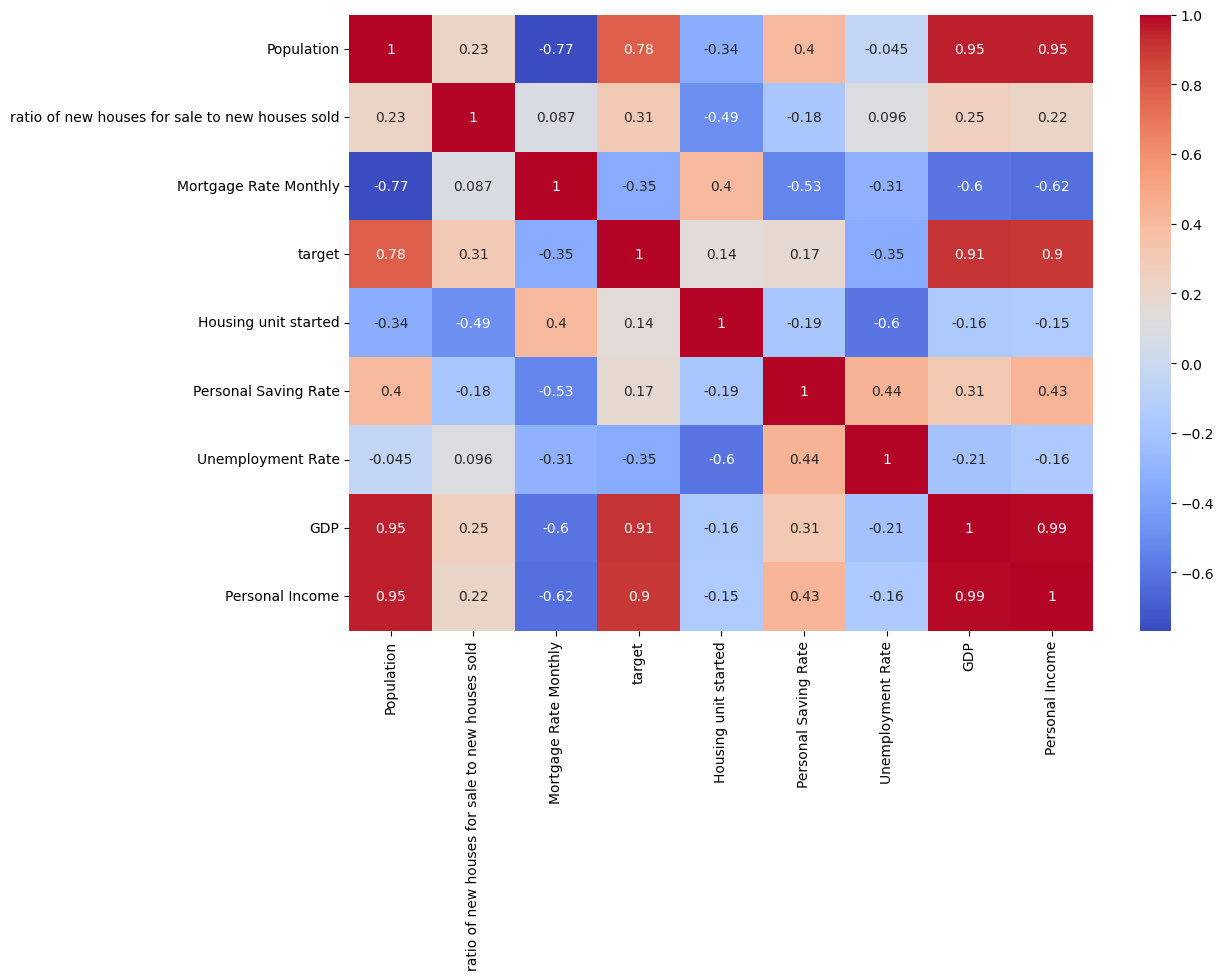

In [128]:
# Correlation matrix
correlation_matrix = final_data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The heatmap shows that the target variable (housing price) is strongly correlated with several other variables, including:

Population (0.78)

Personal income (0.9)

GDP (0.91)

Mortgage rate monthly (-0.35)

This means that these variables are likely to have a significant impact on housing prices. For example, if personal income or GDP increases, housing prices are also likely to increase. Conversely, if mortgage rates increase, housing prices are likely to decrease.

<Figure size 1200x600 with 0 Axes>

<Figure size 600x400 with 0 Axes>

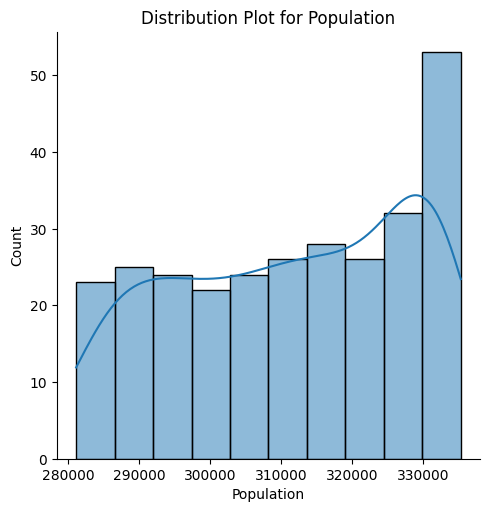

<Figure size 600x400 with 0 Axes>

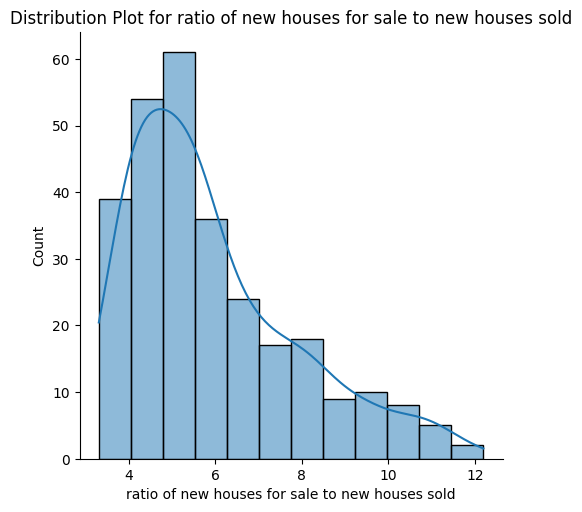

<Figure size 600x400 with 0 Axes>

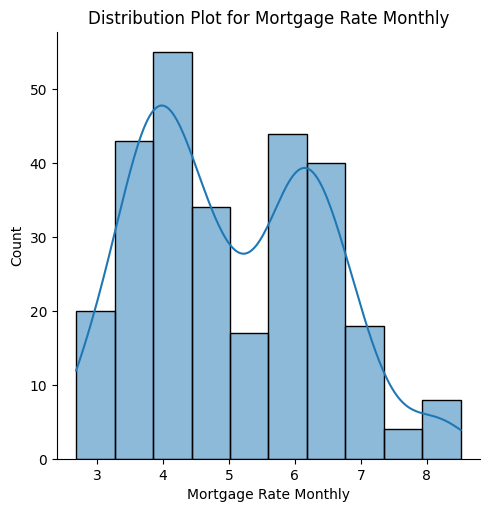

<Figure size 600x400 with 0 Axes>

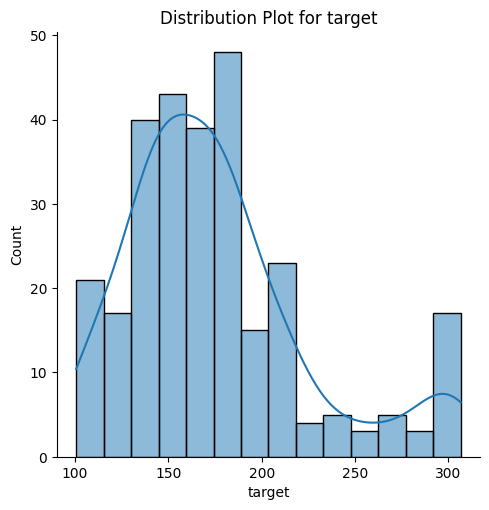

<Figure size 600x400 with 0 Axes>

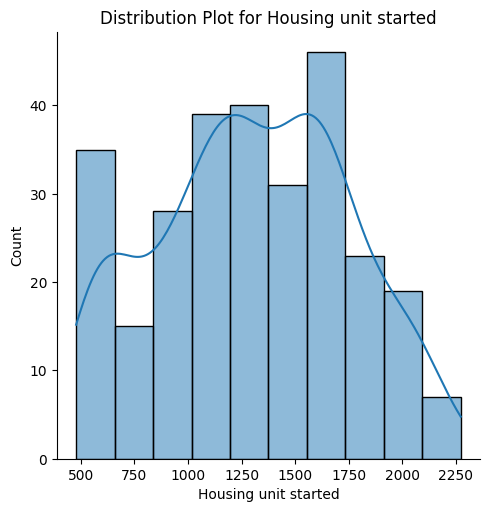

<Figure size 600x400 with 0 Axes>

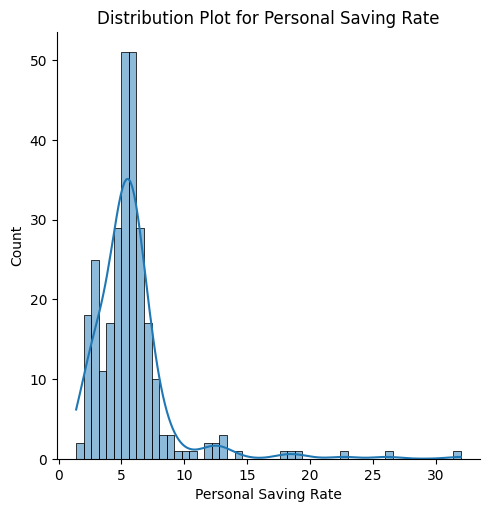

<Figure size 600x400 with 0 Axes>

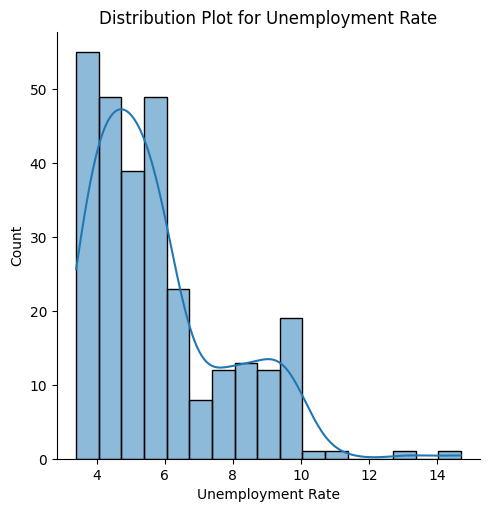

<Figure size 600x400 with 0 Axes>

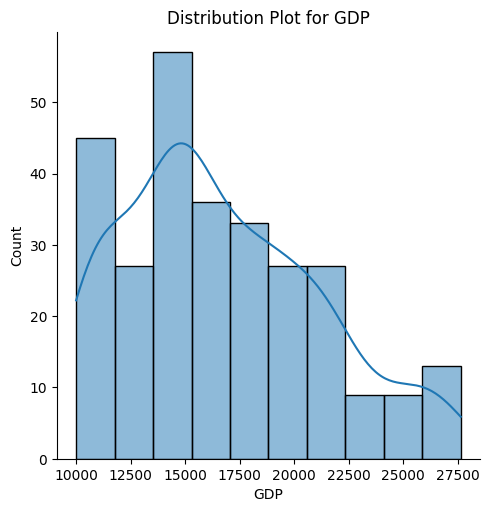

<Figure size 600x400 with 0 Axes>

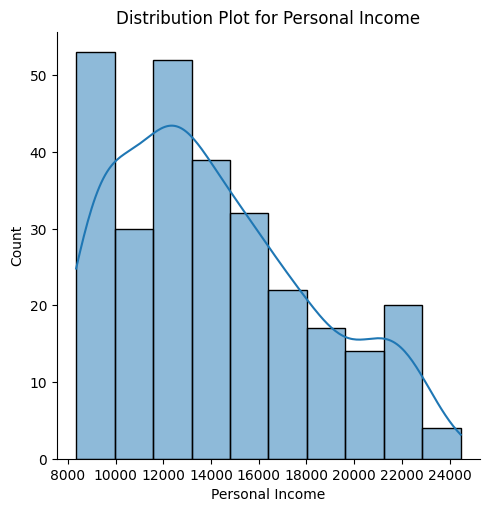

In [130]:
# Lets plot density plot

plt.figure(figsize=(12, 6))
for col in final_data.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.displot(data=final_data, x=col, kde =True)
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')
    plt.show()

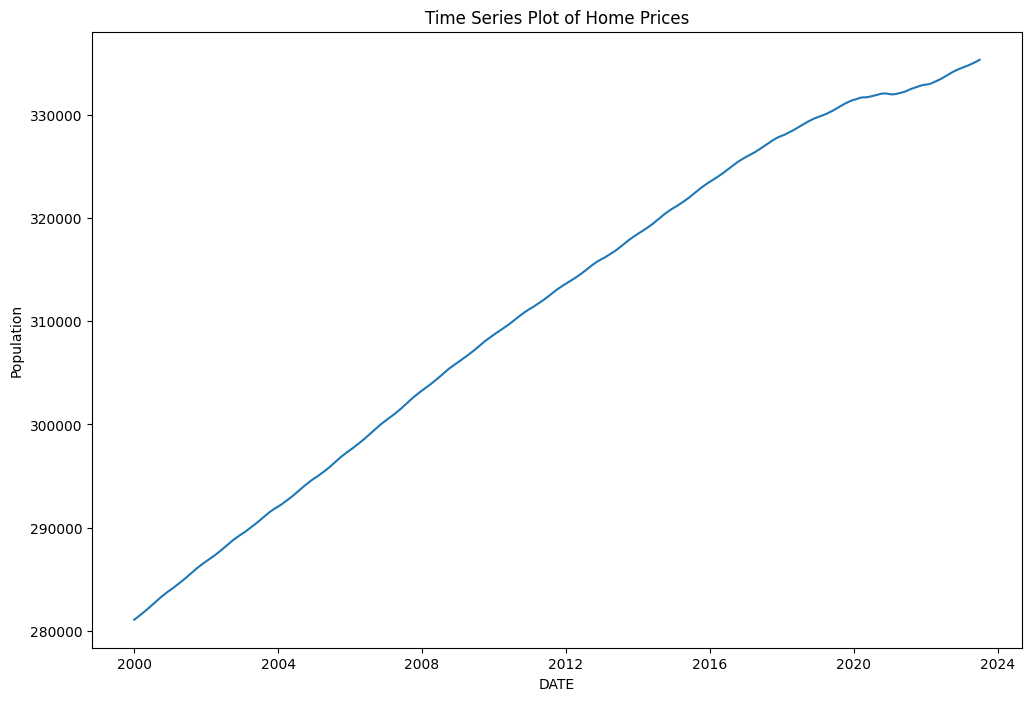

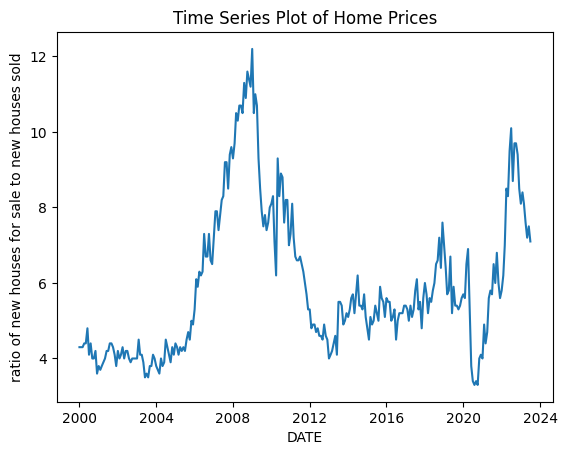

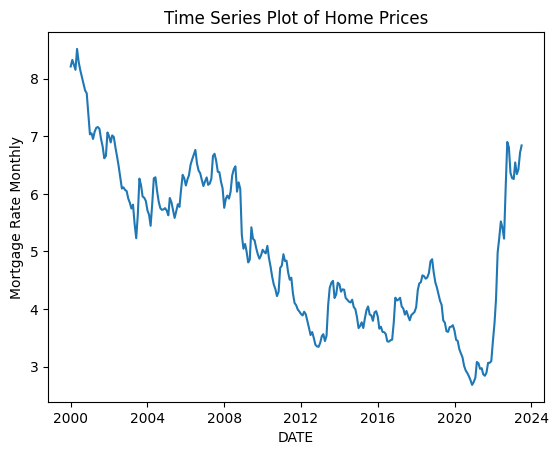

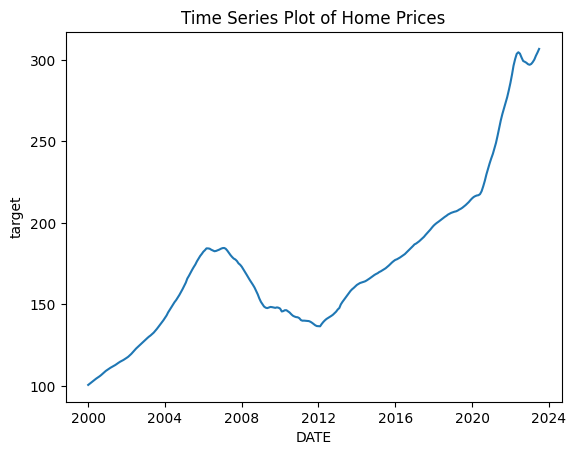

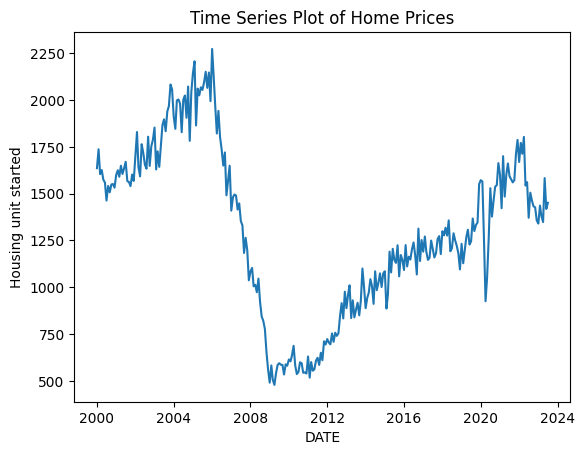

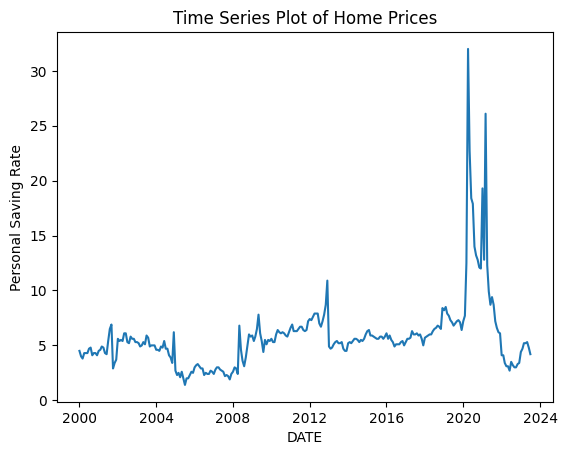

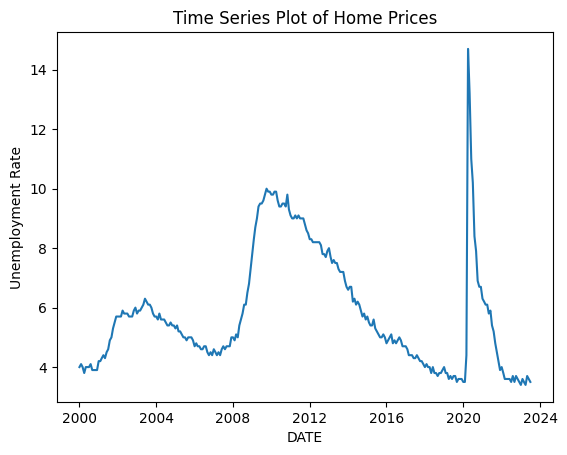

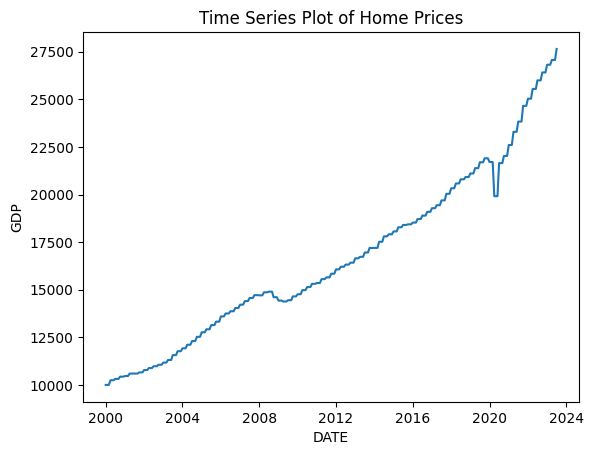

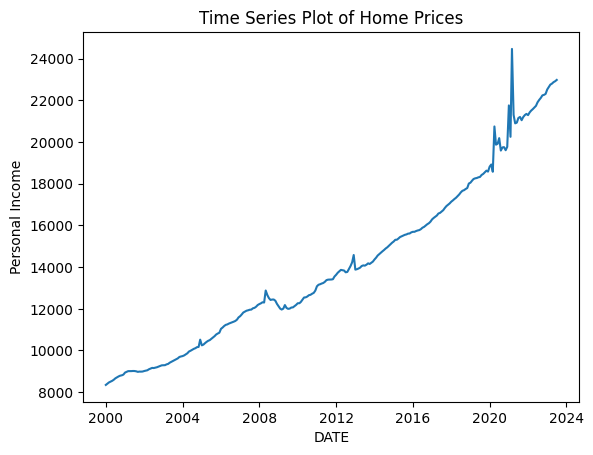

In [135]:
# Time series plot
plt.figure(figsize=(12, 8))
for col in final_data.columns.tolist():
  plt.plot(final_data[col])
  plt.ylabel(f"{col}")
  plt.xlabel('DATE')
  plt.title('Time Series Plot of Home Prices')
  plt.show()

<Figure size 1200x600 with 0 Axes>

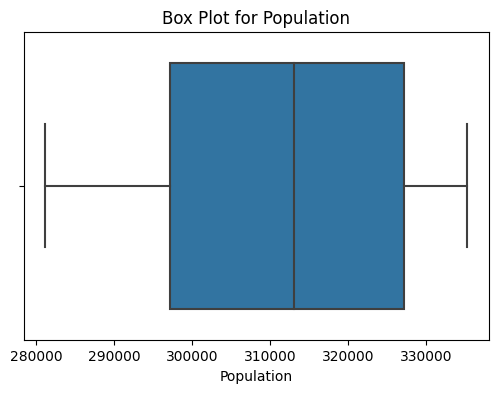

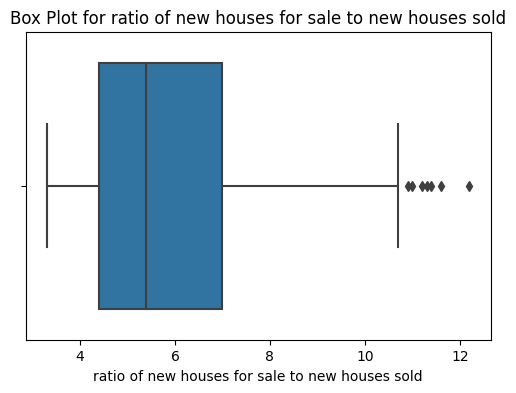

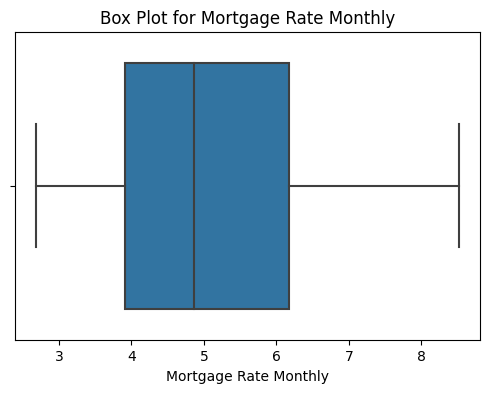

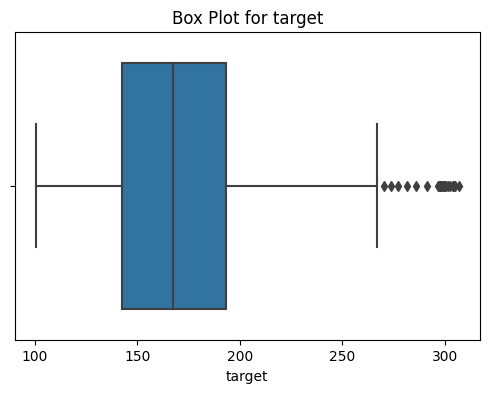

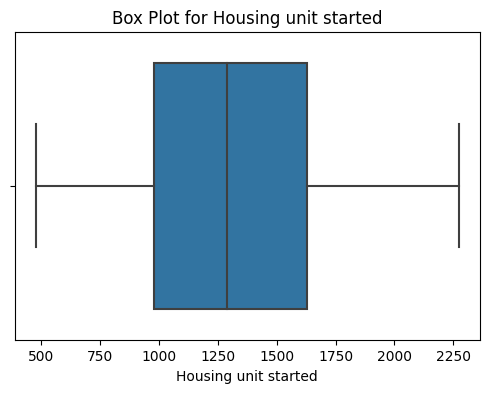

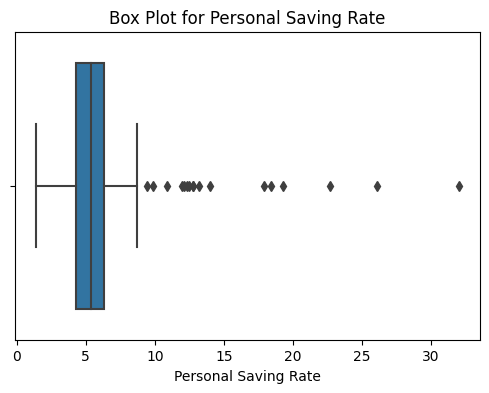

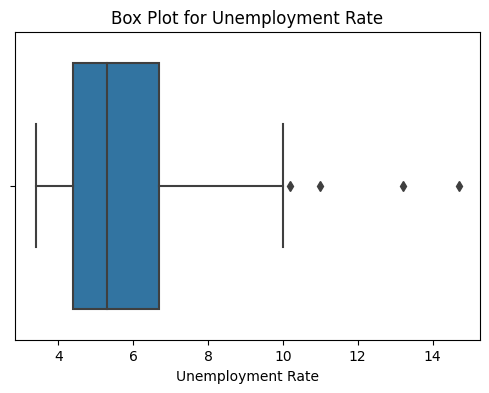

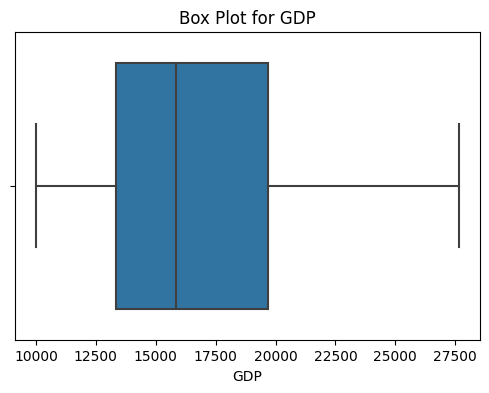

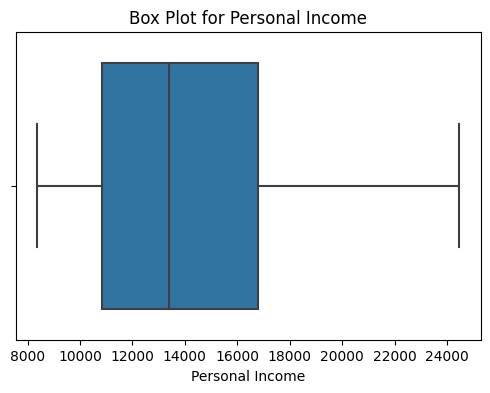

In [131]:
# lets plot boxplot for checking outliers in our data
plt.figure(figsize=(12, 6))
for col in final_data.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=final_data, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box Plot for {col}')
    plt.show()

As we can see, there are outlier in our data mainly in :    

*   Unemployment Rate
*   Personal Saving Rate
*   ratio of new houses for sale to new houses sold





In [136]:
# Lets treat skewness and outliers
final_data['Personal Saving Rate'].skew()

3.881970962649685

As we can see, Personal Saving Rate is highly right skewed.

In [139]:
from scipy.stats import boxcox
final_data['boxcox_personal_saving_rate'], _ = boxcox(final_data['Personal Saving Rate'])

In [140]:
final_data['Personal Saving Rate'].skew()

3.881970962649685

In [141]:
final_data['boxcox_personal_saving_rate'].skew()

-0.0359416881912632

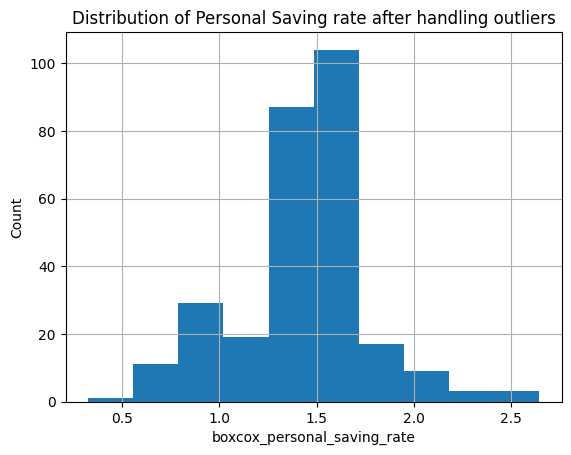

In [142]:
final_data['boxcox_personal_saving_rate'].hist()
plt.title("Distribution of Personal Saving rate after handling outliers")
plt.xlabel("boxcox_personal_saving_rate")
plt.ylabel("Count")
plt.show()

In [143]:
final_data['Unemployment Rate'].skew()

1.1831150909985555

In [144]:
final_data['boxcox_Unemployment Rate'], _ = boxcox(final_data['Unemployment Rate'])

In [145]:
final_data['boxcox_Unemployment Rate'].skew()

0.08383545873152397

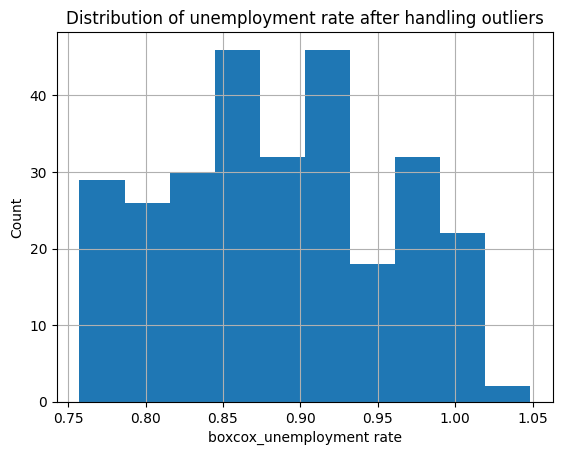

In [146]:
final_data['boxcox_Unemployment Rate'].hist()
plt.title("Distribution of unemployment rate after handling outliers")
plt.xlabel("boxcox_unemployment rate")
plt.ylabel("Count")
plt.show()

Lets understand the correlation between the data

In [148]:
corr_matrix= final_data.corr()
corr_matrix['target'].sort_values(ascending=False)

target                                             1.000000
GDP                                                0.910526
Personal Income                                    0.897721
Population                                         0.779723
ratio of new houses for sale to new houses sold    0.306087
Personal Saving Rate                               0.174630
Housing unit started                               0.144211
boxcox_personal_saving_rate                        0.067577
Mortgage Rate Monthly                             -0.350813
Unemployment Rate                                 -0.352774
boxcox_Unemployment Rate                          -0.469225
Name: target, dtype: float64

In [150]:
final_data.to_csv("/content/Final Data/final_data.csv")

# Modeling

Lets start with reading and spliting the data

In [152]:
final_data.drop(columns={'Personal Saving Rate', 'Unemployment Rate'}, inplace=True)


In [153]:
final_data.head(15)

,Population,ratio of new houses for sale to new houses sold,Mortgage Rate Monthly,target,Housing unit started,GDP,Personal Income,boxcox_personal_saving_rate,boxcox_Unemployment Rate
DATE,,,,,,,,,
2000-01-01,281083.0,4.3,8.2100,100.551,1636.0,10002.179,8348.0,1.332745,0.810307
2000-02-01,281299.0,4.3,8.3250,101.339,1737.0,10002.179,8408.8,1.239841,0.817734
2000-03-01,281531.0,4.3,8.2400,102.127,1604.0,10002.179,8468.3,1.198817,0.810307
2000-04-01,281763.0,4.4,8.1525,102.922,1626.0,10247.720,8506.8,1.297098,0.794365
2000-05-01,281996.0,4.4,8.5150,103.678,1575.0,10247.720,8544.5,1.297098,0.810307
2000-06-01,282247.0,4.8,8.2880,104.424,1559.0,10247.720,8597.8,1.297098,0.810307
2000-07-01,282504.0,4.1,8.1475,105.054,1463.0,10318.165,8665.3,1.366594,0.810307
2000-08-01,282769.0,4.4,8.0275,105.768,1541.0,10318.165,8712.2,1.382895,0.817734
2000-09-01,283033.0,4.0,7.9120,106.538,1507.0,10318.165,8757.7,1.259467,0.802526


In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X = final_data[['Population', 'ratio of new houses for sale to new houses sold', 'Mortgage Rate Monthly', 'Housing unit started',	'GDP',	'Personal Income',	'boxcox_personal_saving_rate',	'boxcox_Unemployment Rate']]
y = final_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

In [157]:
model.fit(X_train, y_train) #fitting the model to training data

LinearRegression()

In [158]:
predictions = model.predict(X_test)

In [159]:
# Lets evaluate our model using MSE and R-squared
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 43.16023470526665
R-squared: 0.9825452740643759


In [160]:
# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-8.14261830e-04  5.43326200e+00 -1.60905934e-01  4.27921037e-02
  9.79650060e-03  4.41873751e-03 -1.93114283e+01  1.09073569e+02]
Intercept: 46.77739455592156


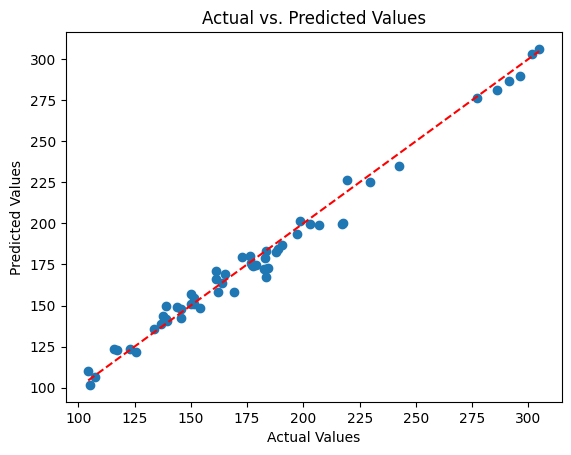

In [162]:
#Lets visualise our model prediction

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')
plt.show()